In [2]:
import pandas as pd
import numpy as np
import sys, os
import pickle
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.family'] = 'Malgun Gothic'

# Problem Definition

(0) target feature candidates (in other words, these can not be independable variable)

  - Users_rated : 일종의 관심도에 대한 양적 수치로 해석될 수 있음.
  - Rating : 인기 지표
  - Rank : Rating을 통한 줄 세우기
  - Own : 판매량에 대한 수치로 해석 될 수 있음


(1) 제품 정보만으로 관심도(Users_Rated), 평가(Rating), 사람들이 받아들이는 난이도의 정도 (Complexity)를 모델링할 수 있는가?

  1. 어떤 테마, 플레이어 인원 수, 메커니즘, 도메인, 카테고리를 섞었을 때 많은 관심, 좋은 평가, 그리고 유저가 받아들이는 난이도는 어떤 관계를 가지는가?

 - target : Users_rated, Rating, Complexity, Own

  2. 참가 디자이너, 아티스트가 많아지면 게임의 질이 향상되는 것일까?

 - 게임의 요소가 다양해짐과 게임의 질은 어떤 상관 관계를 가지는가?

 (2) 어느 정도의 복잡함(Complexity, Language dependece, Age)가 평가에 어떻게 영향을 미치는가?

 - target : Rating

 - 대중성을 위한 난이도 선택은 어느 정도가 적절한가?


아래부턴 옵션


(3) 협력 게임과 대전 게임중 어느 것을 선호할까?

(4) 1인 플레이 게임은 대중적인가? 

In [3]:
df = pd.read_csv("./dataset/new_bgg_data_after_eda2_new.csv",encoding="utf-8")
df.drop(columns = ["Rank", "Id", "Name"], inplace = True)

In [3]:
df.dropna(subset="Own", inplace=True)

### 1. Visualizing the Features

In [4]:
def visualizing(features,
                condition = None,
                scale = None,
                continuous_value= False,
                show_values = False,
                sns_args = {},
                plot_args = {},
                plot_type = None,
                rotation = 0):
    
    sns.set(rc={'figure.figsize':(18, 10),
                'font.family':'Malgun Gothic'})
    if(continuous_value): 
                
        data = features.copy()
        if scale is not None:
            data = scale(data)
        
        if condition is not None:
            data = data[condition(data)]

        data = data.to_frame()        
    
        if plot_type == None:
            ax = sns.histplot(data=data, x=data.columns[0], **plot_args)
        
        if plot_type == "box":
            ax = sns.boxplot(data=data, x=data.columns[0], **plot_args)

    else: # discrete
        
        data = features.value_counts(ascending=False)
               
        if condition is not None:
            data = data.copy()
            data = data[condition(data)]
            
        data = data.to_frame()
        
        if plot_type == None:
            ax = sns.barplot(data, x=data.index, y=data.columns[0])
            
        if plot_type == "box":
            ax = sns.boxplot(data=data, x=data.index, **plot_args)
    if show_values:
        for i in ax.containers:
            ax.bar_label(i,)
        
    ax.set(**sns_args)
    plt.xticks(rotation = rotation)

1.1 prior information

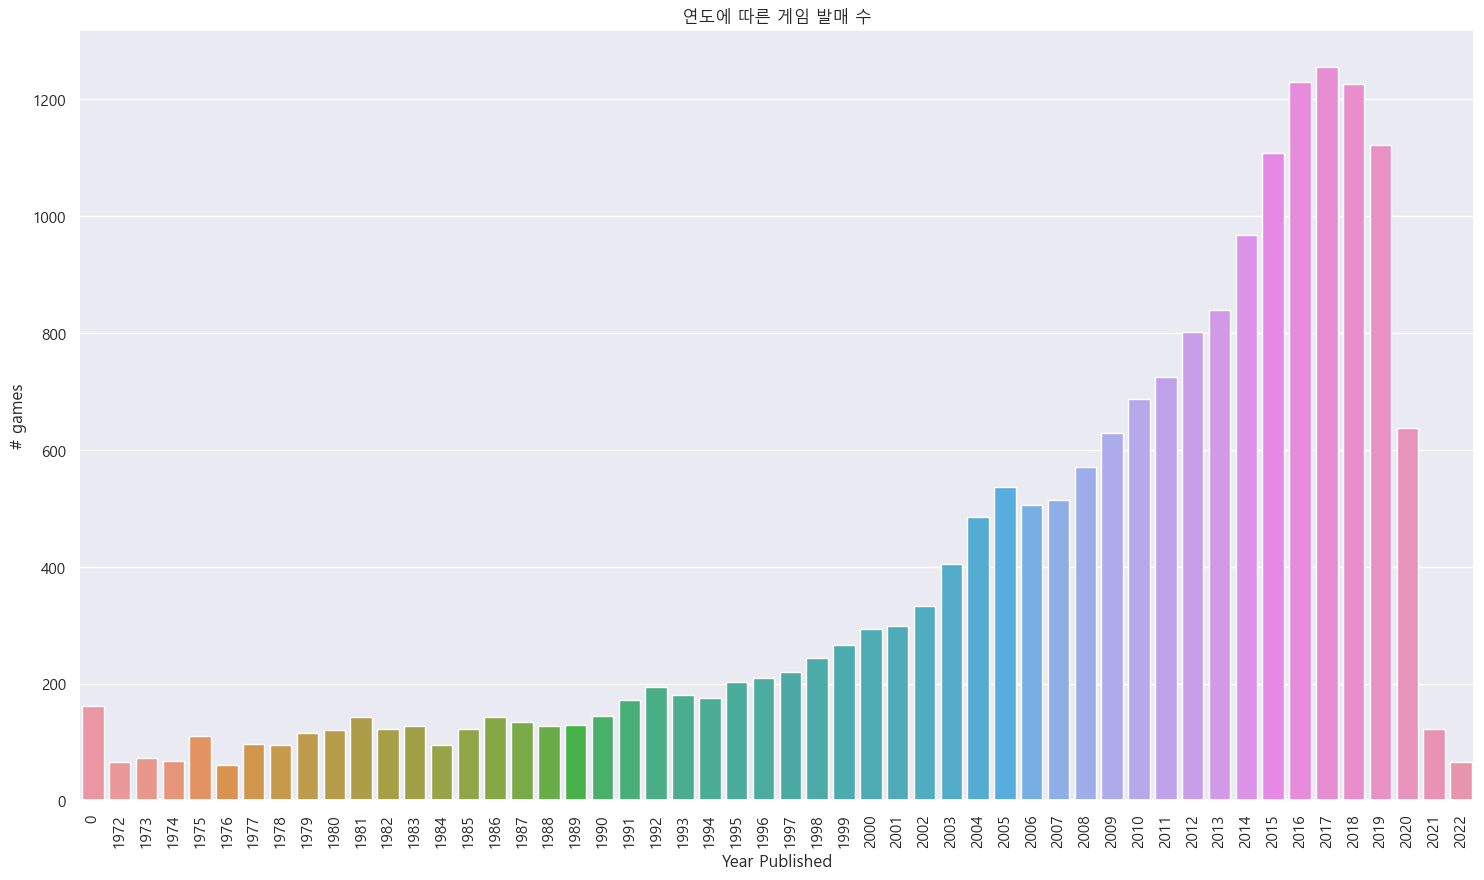

In [5]:
visualizing(df.Year, lambda x : x > 50, rotation = 90,
                                        sns_args = {'xlabel':"Year Published",
                                                   "ylabel":"# games",
                                                   "title":"연도에 따른 게임 발매 수"})


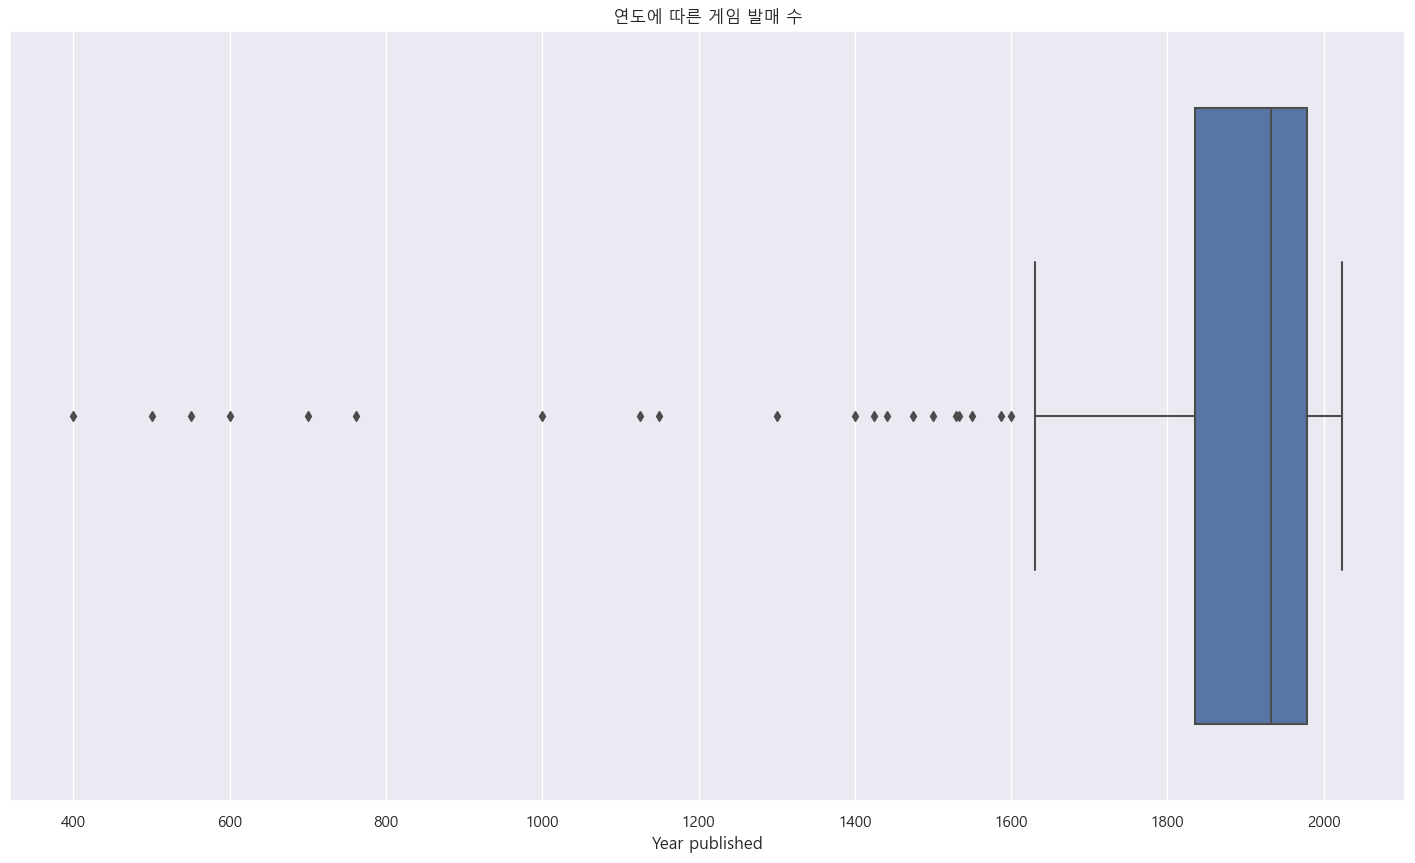

In [6]:
visualizing(df.Year, lambda x : x.index > 0, plot_type="box",
                                        sns_args = {'xlabel':"Year published",
                                                   "title":"연도에 따른 게임 발매 수"})

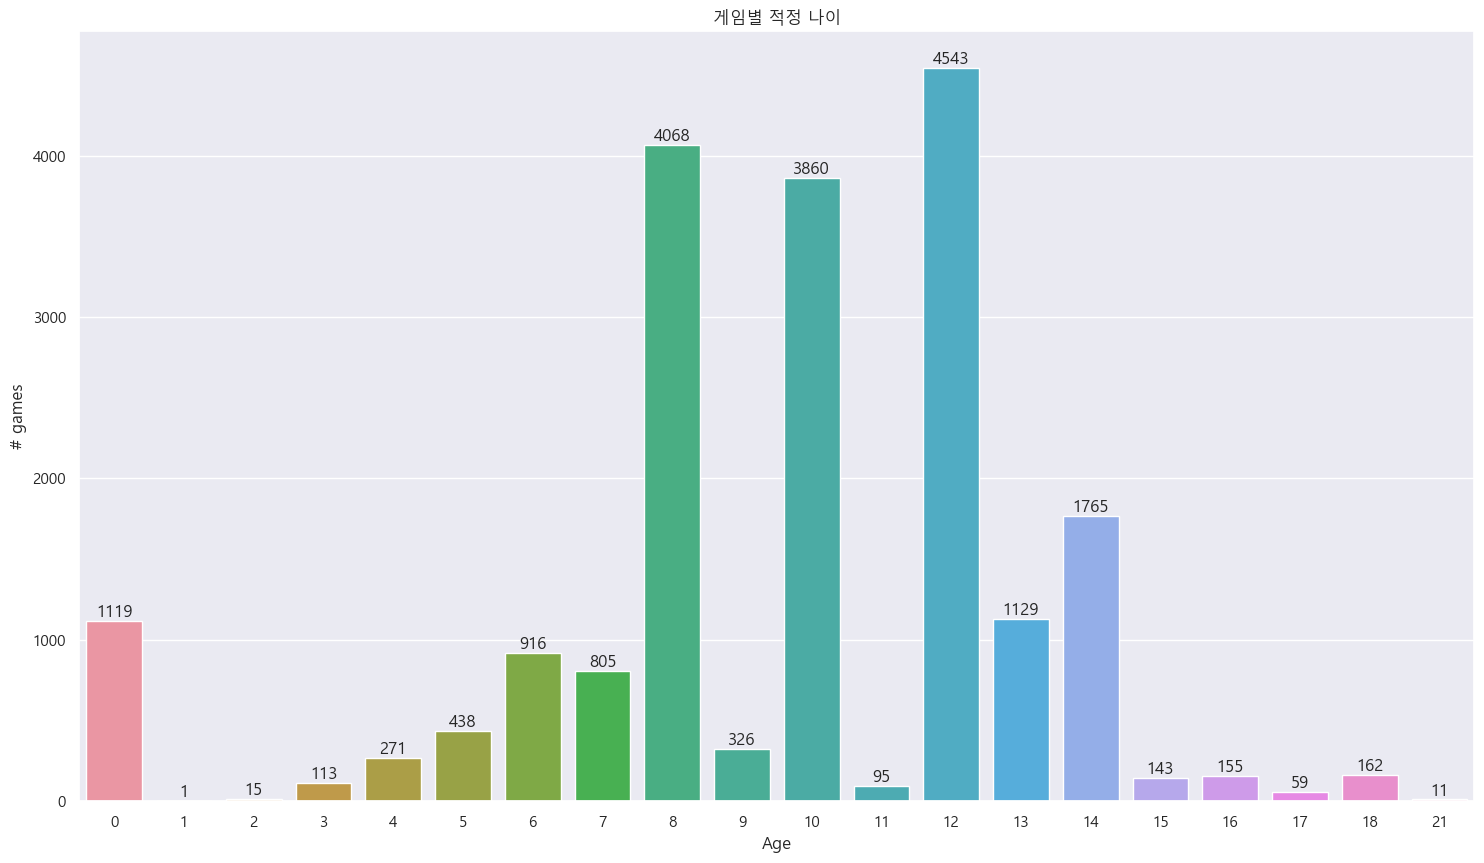

In [7]:
visualizing(df.Age, show_values = True, sns_args = {'xlabel':"Age",
                                                "ylabel":"# games",
                                                "title":"게임별 적정 나이"})

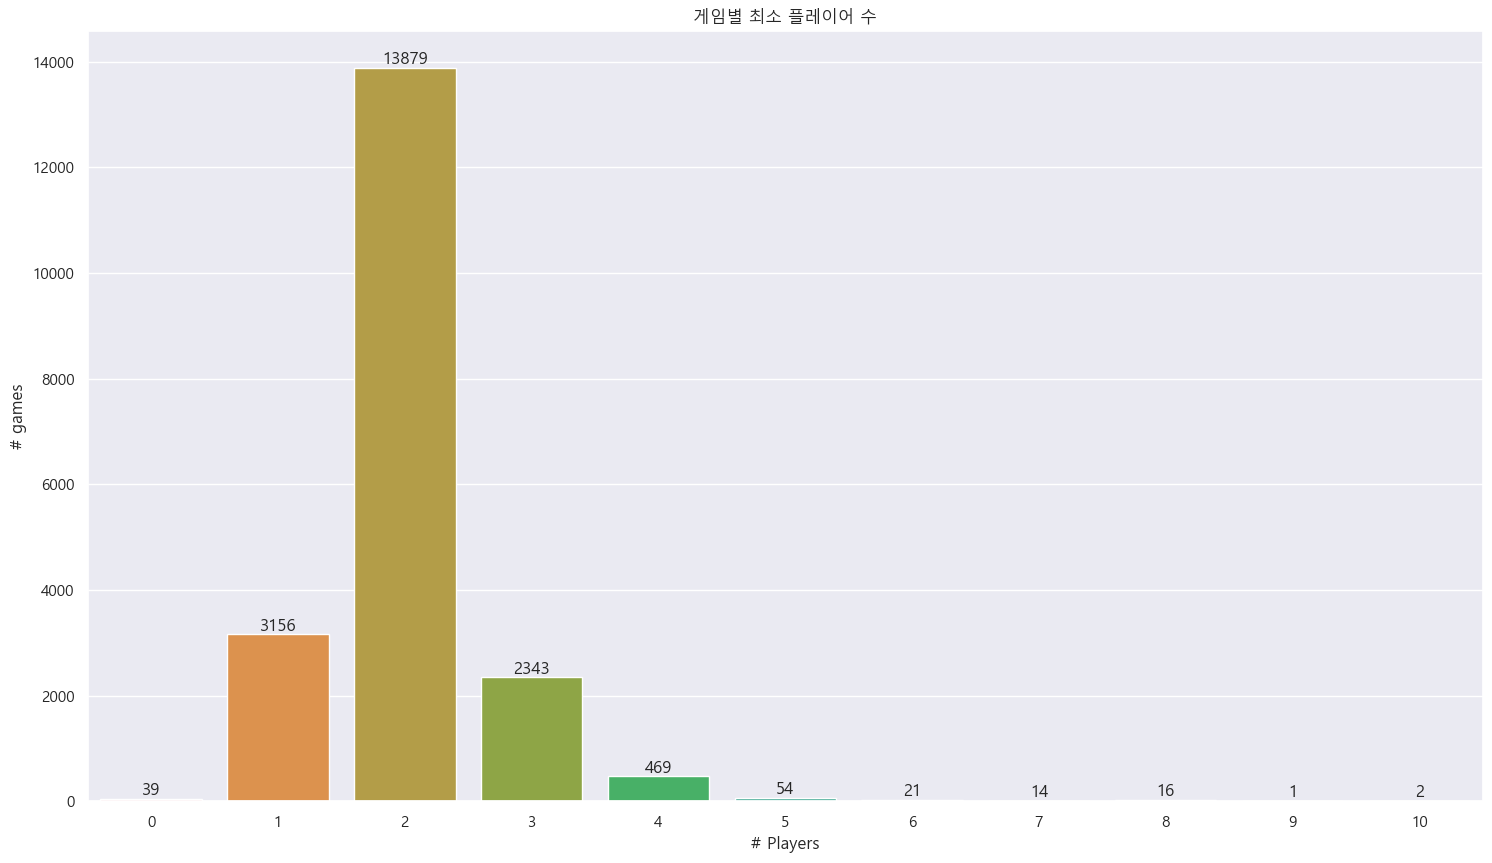

In [8]:
visualizing(df.Minplayers, show_values = True, sns_args = {'xlabel':"# Players",
                                                "ylabel":"# games",
                                                "title":"게임별 최소 플레이어 수"})

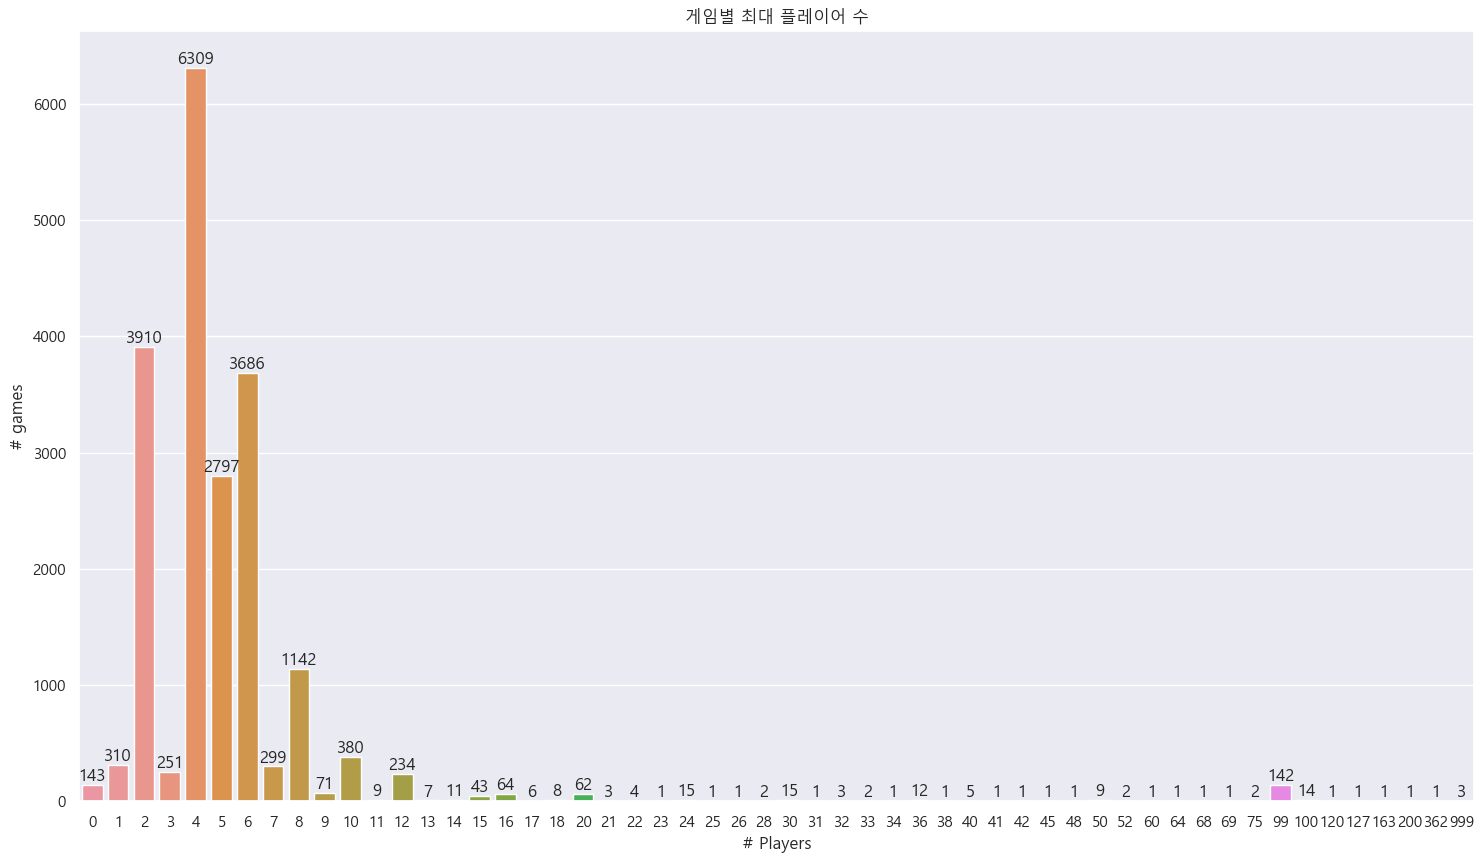

In [9]:
visualizing(df.Maxplayers, show_values = True, sns_args = {'xlabel':"# Players",
                                                "ylabel":"# games",
                                                "title":"게임별 최대 플레이어 수"})

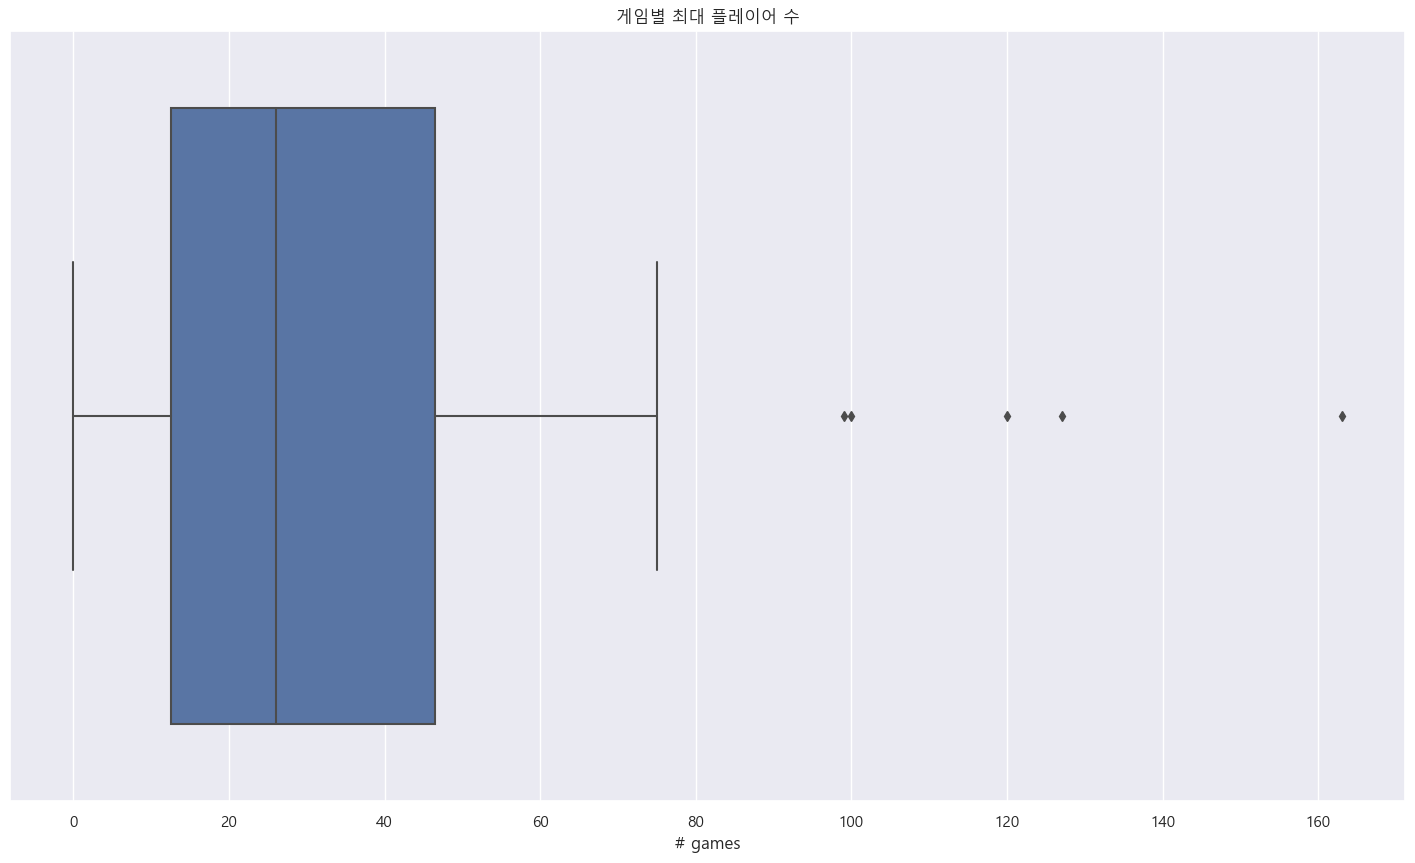

In [10]:
visualizing(df.Maxplayers, lambda x : x.index < 200, plot_type="box",  show_values = True, sns_args = {'xlabel':"# games",
                                                "title":"게임별 최대 플레이어 수"})

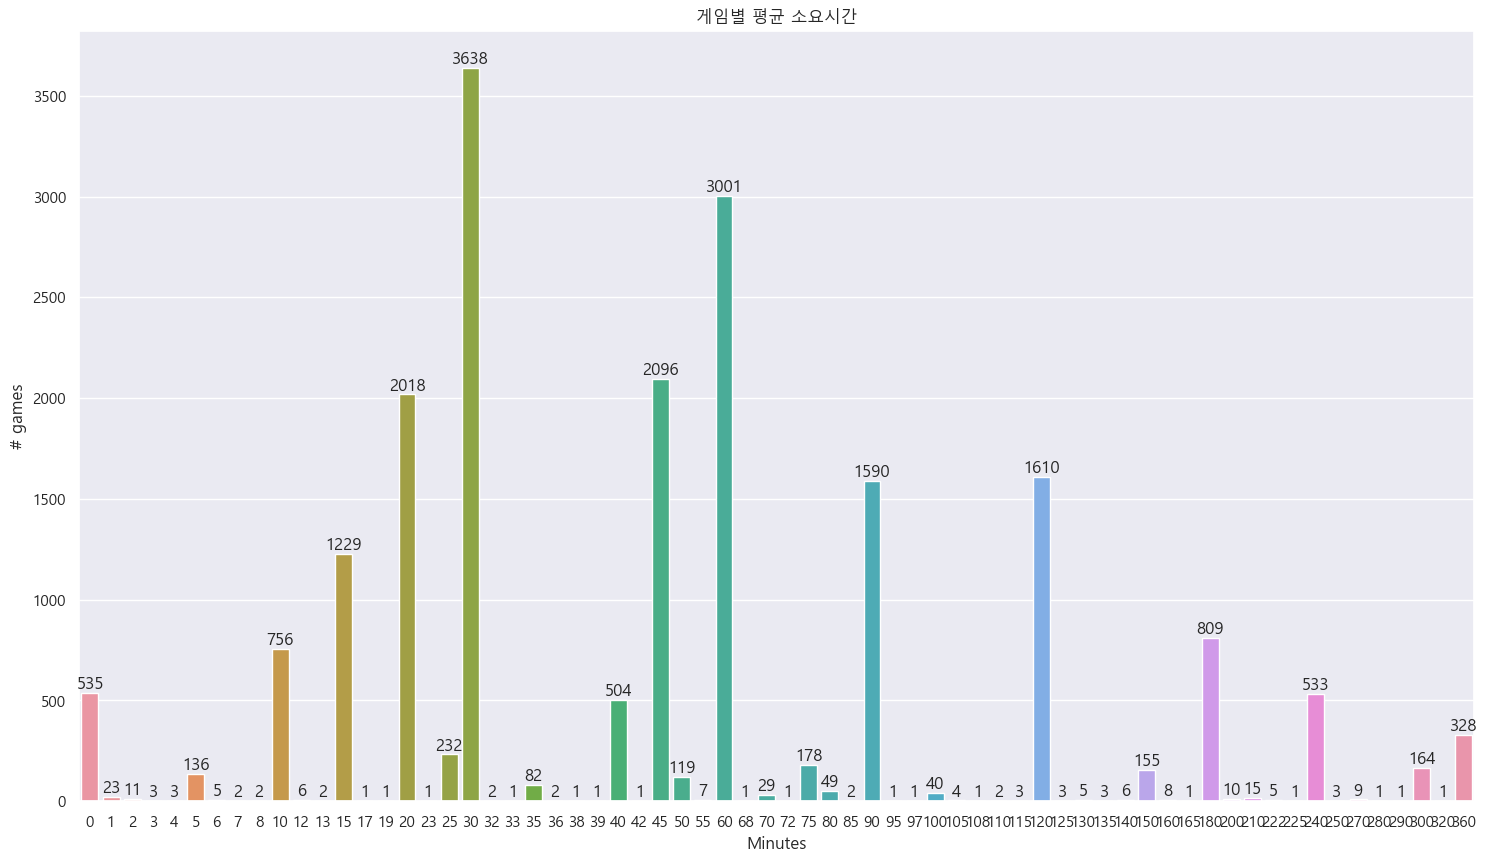

In [11]:
visualizing(df.Time, show_values = True, sns_args = {'xlabel':"Minutes",
                                                "ylabel":"# games",
                                                "title":"게임별 평균 소요시간"})

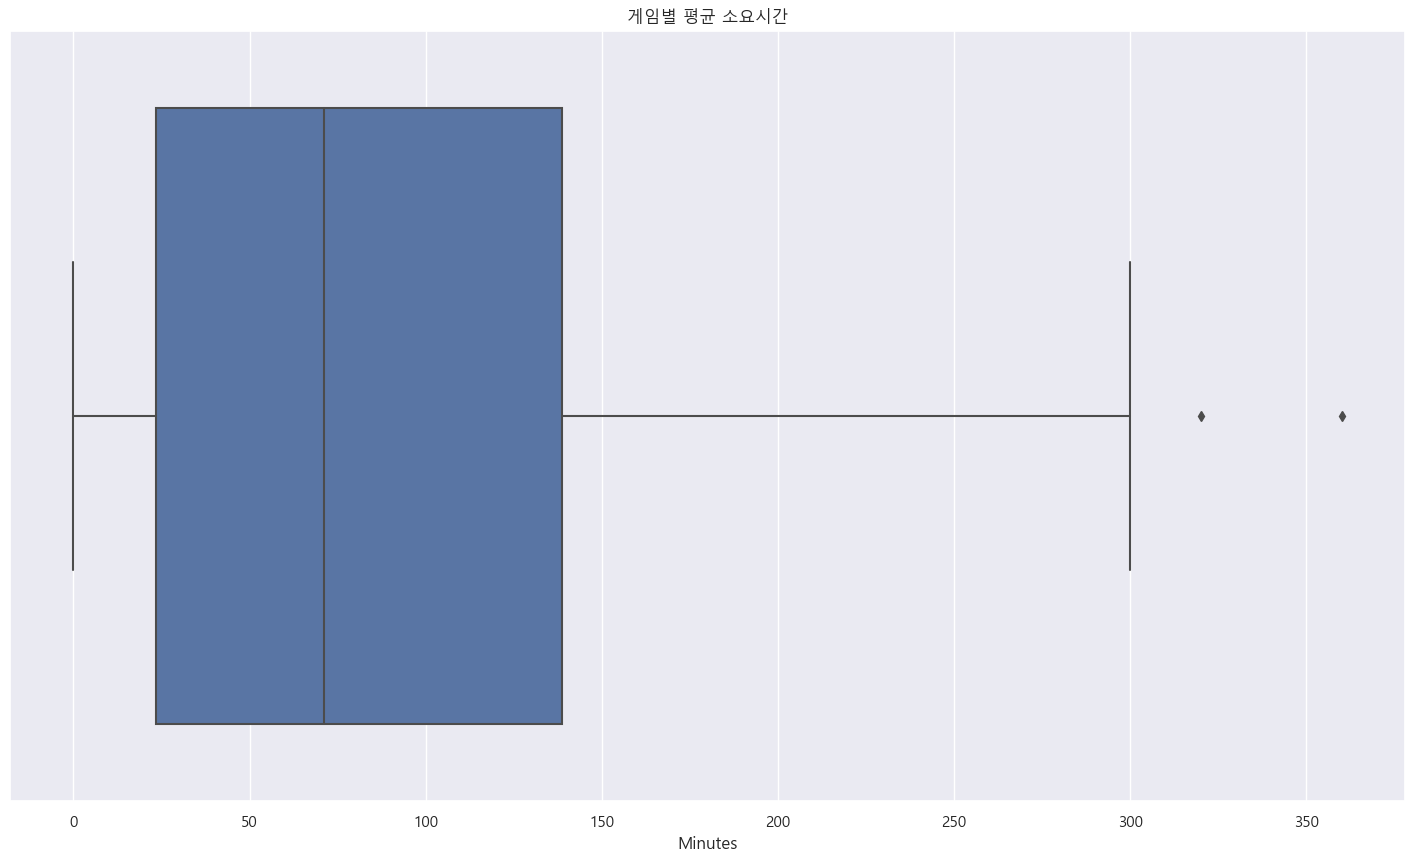

In [12]:
visualizing(df.Time,plot_type="box", show_values = True, sns_args = {'xlabel':"Minutes",
                                                "title":"게임별 평균 소요시간"})

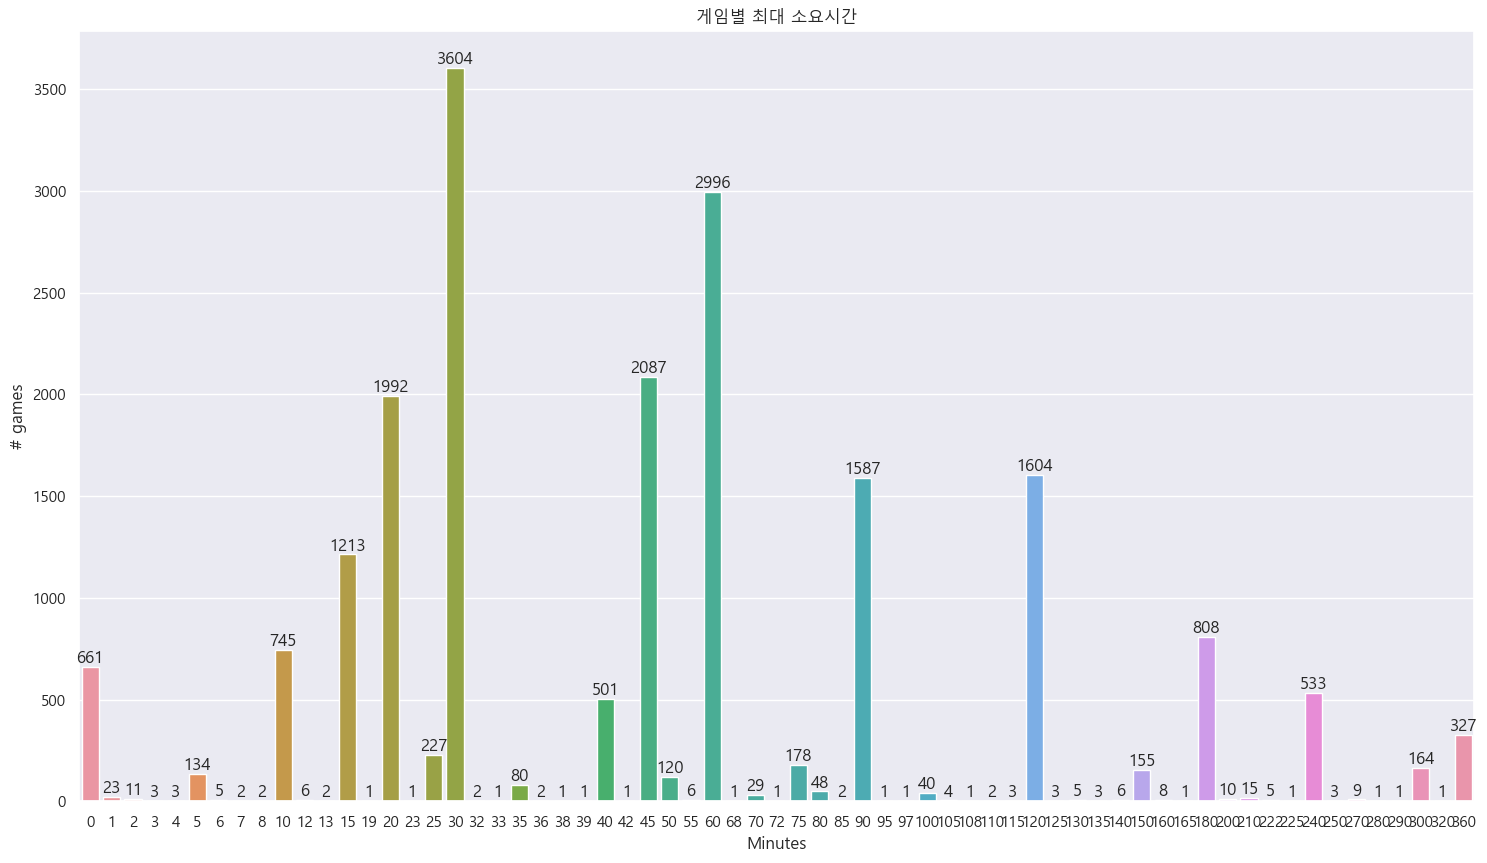

In [13]:
visualizing(df.Maxtime, show_values = True, sns_args = {'xlabel':"Minutes",
                                                "ylabel":"# games",
                                                "title":"게임별 최대 소요시간"})

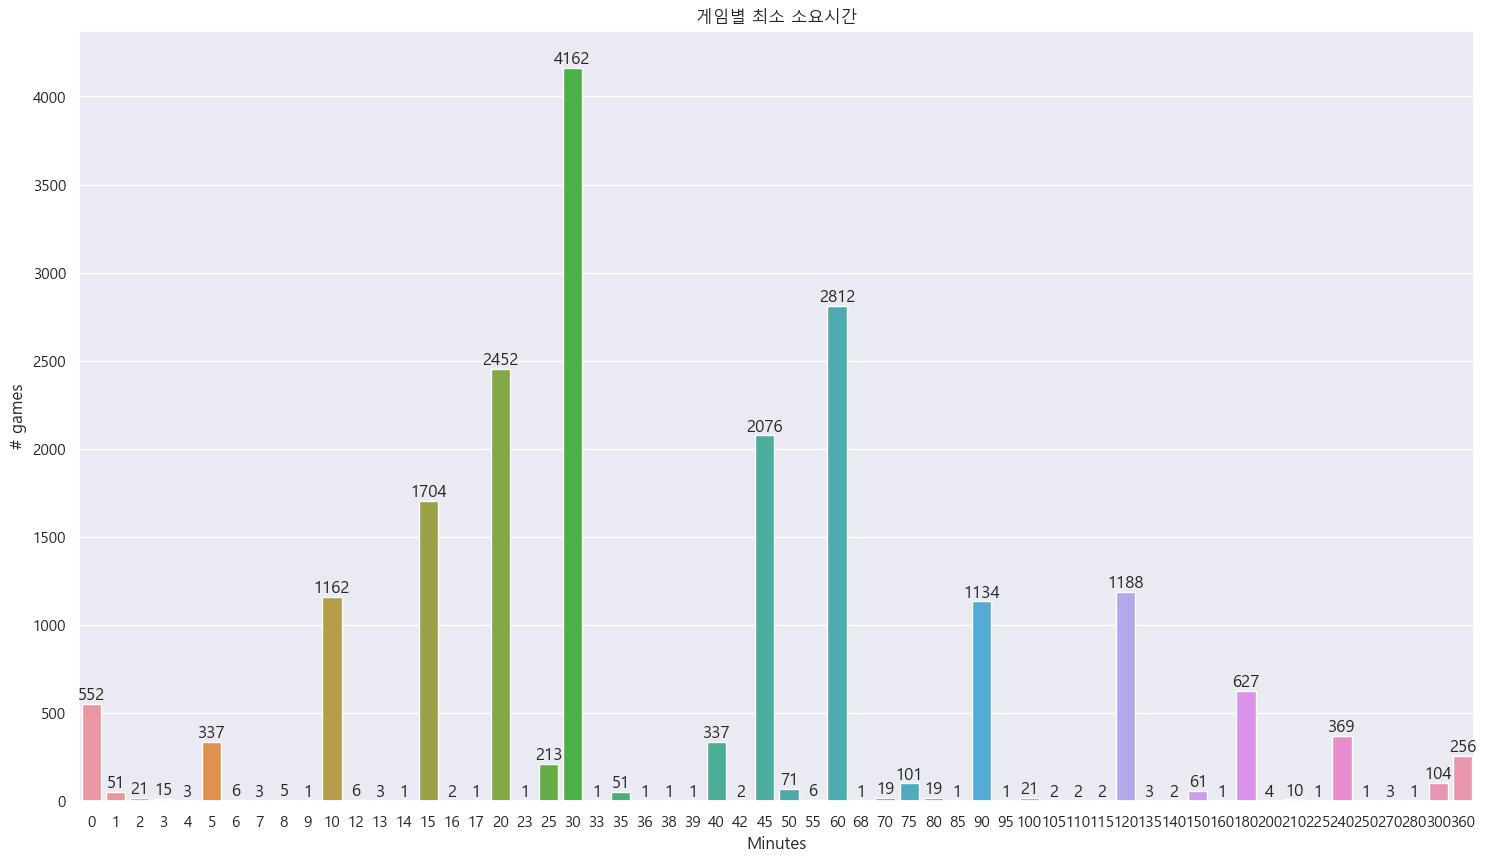

In [14]:
visualizing(df.Mintime, show_values = True, sns_args = {'xlabel':"Minutes",
                                                "ylabel":"# games",
                                                "title":"게임별 최소 소요시간"})

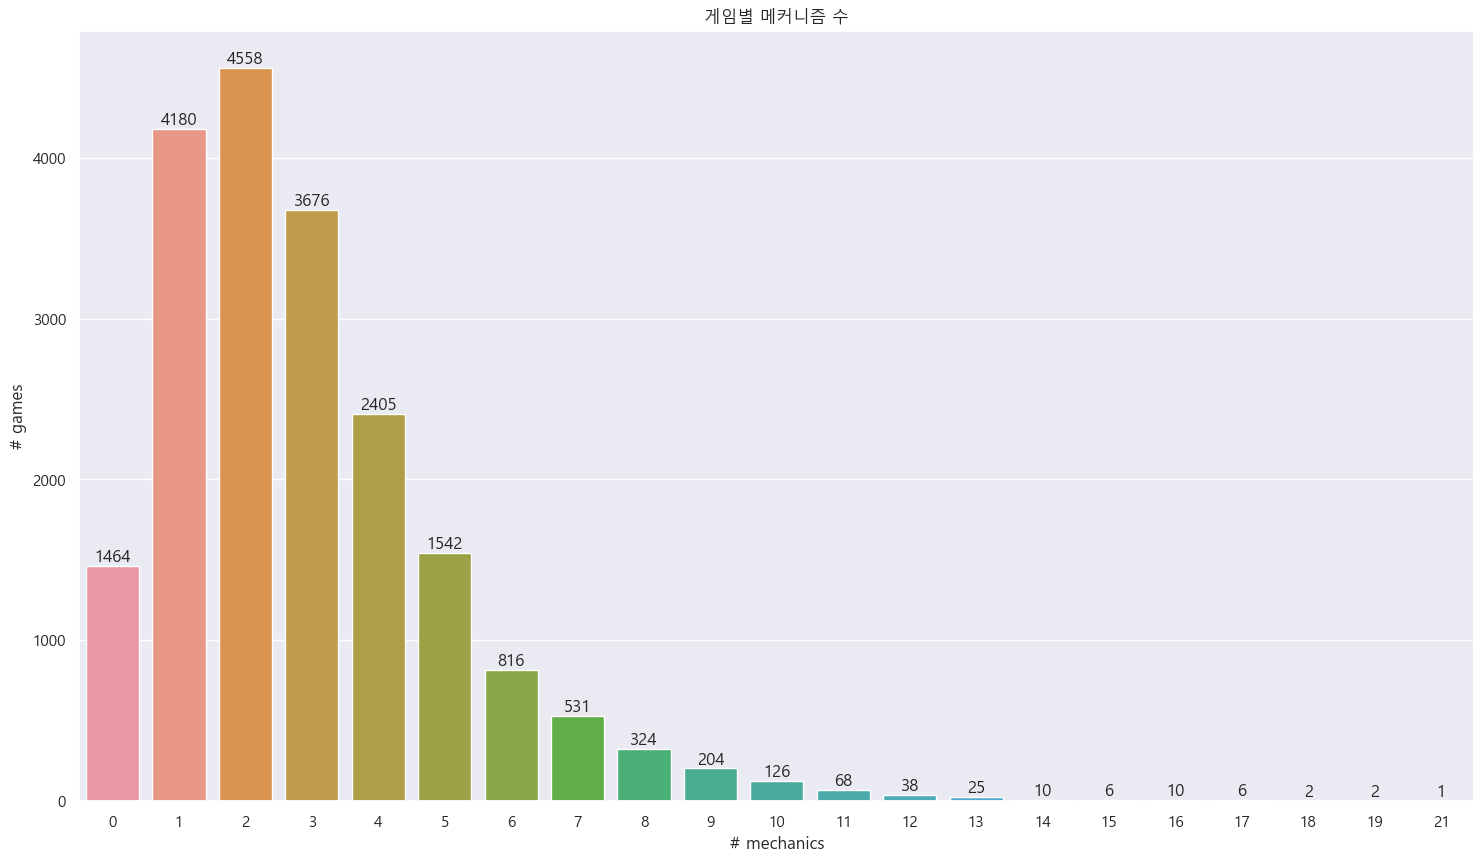

In [15]:
visualizing(df.Nmechanics, show_values = True, sns_args = {'xlabel':"# mechanics",
                                                "ylabel":"# games",
                                                "title":"게임별 메커니즘 수"})

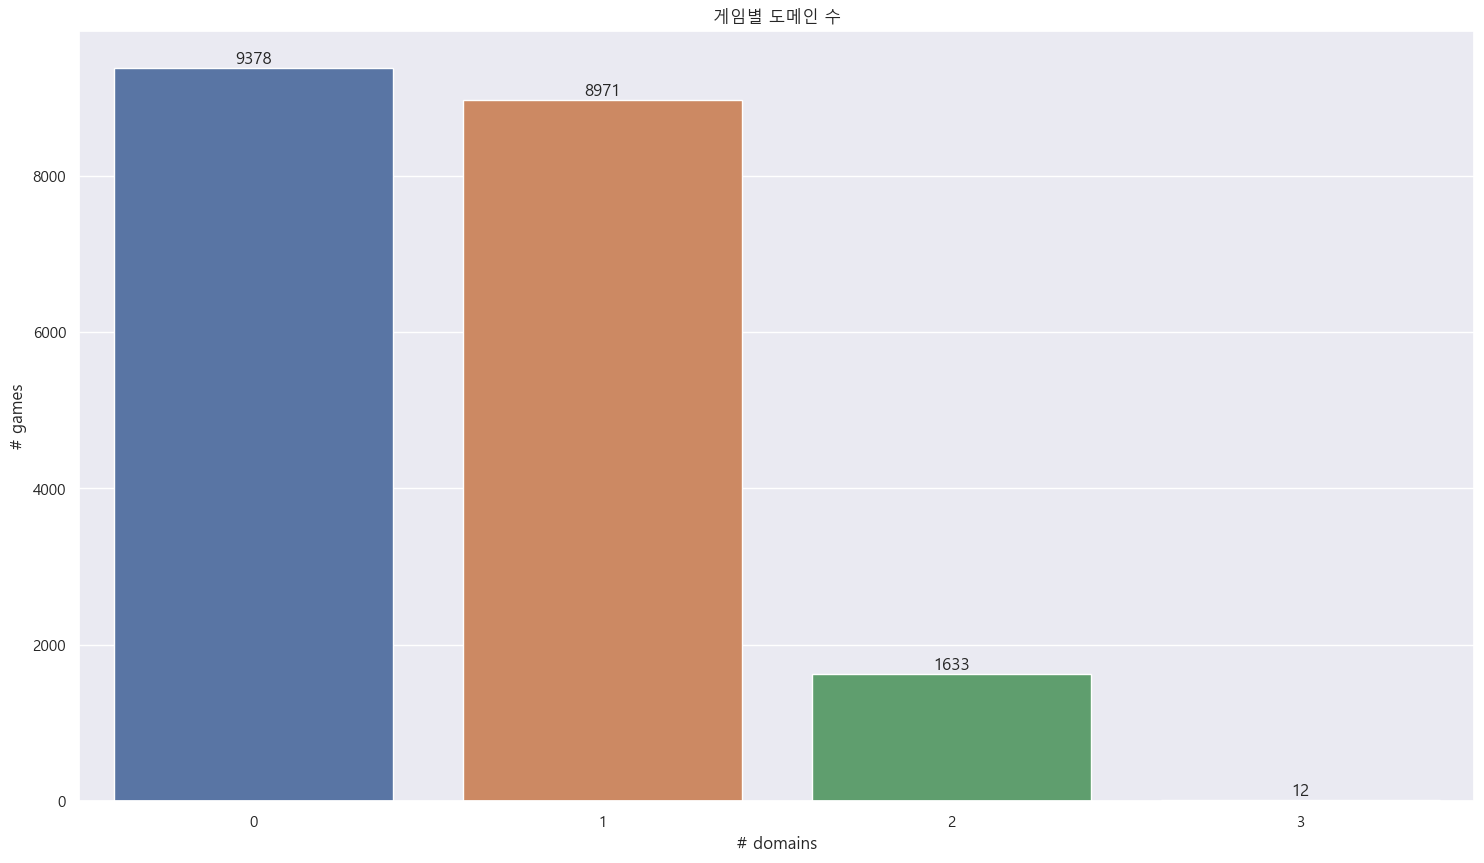

In [16]:
visualizing(df.Ndomains, show_values = True, sns_args = {'xlabel':"# domains",
                                                "ylabel":"# games",
                                                "title":"게임별 도메인 수"})

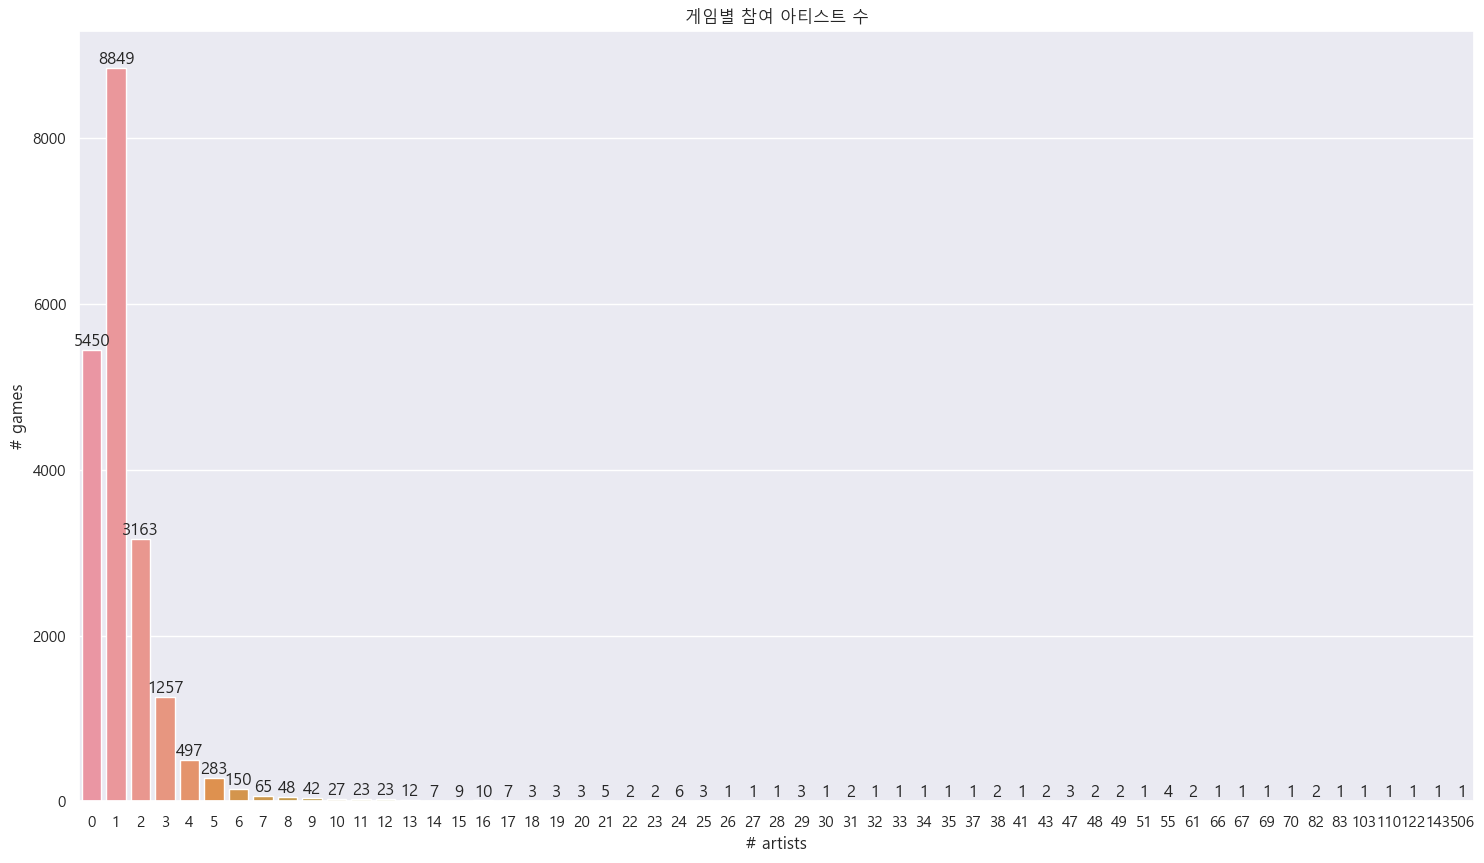

In [17]:
visualizing(df.Nartist, show_values = True, sns_args = {'xlabel':"# artists",
                                                "ylabel":"# games",
                                                "title":"게임별 참여 아티스트 수"})

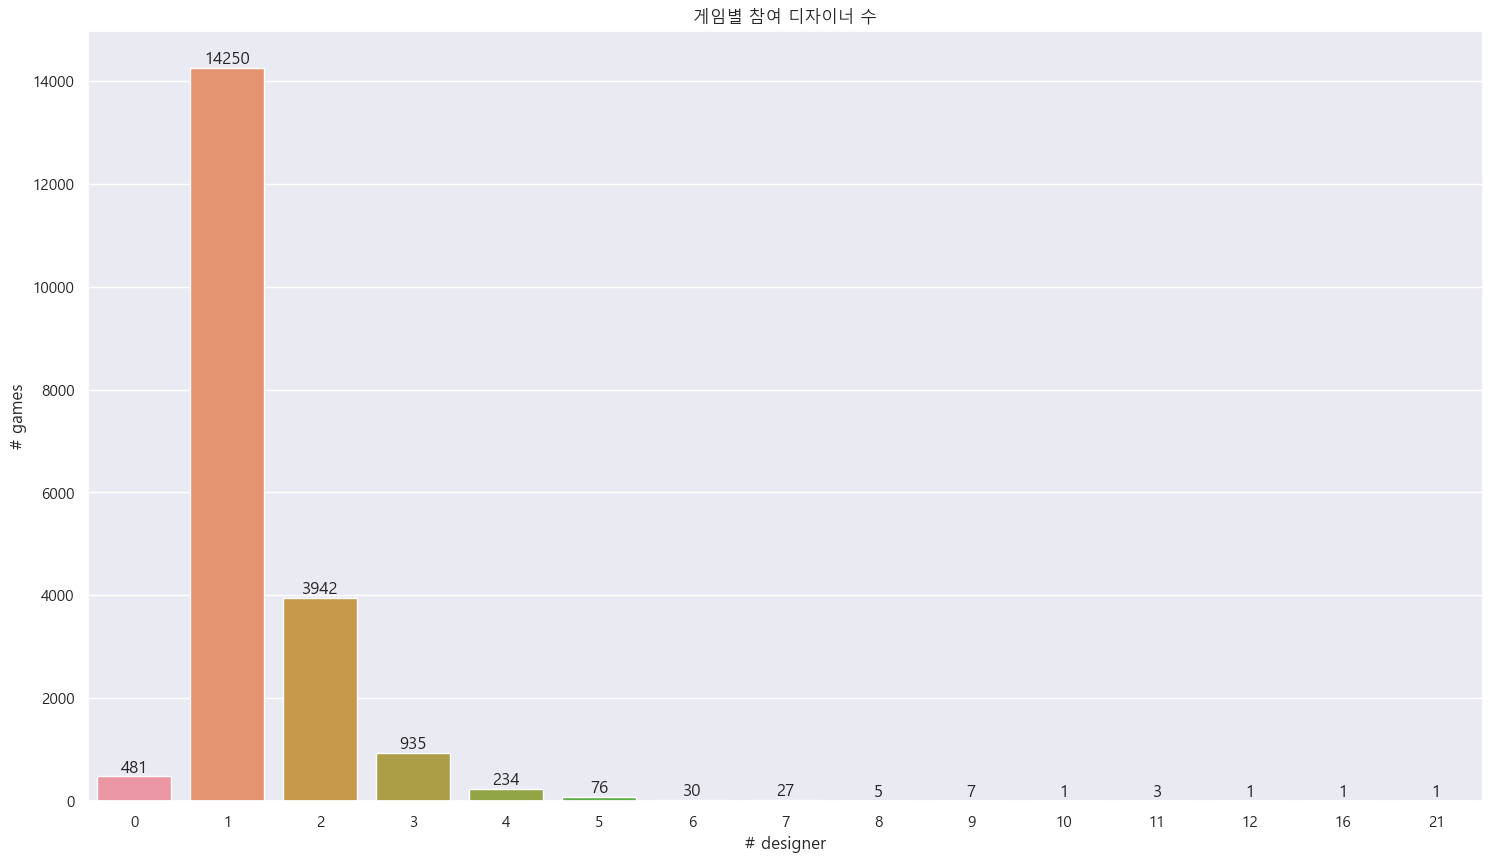

In [18]:
visualizing(df.Ndesign, show_values = True, sns_args = {'xlabel':"# designer",
                                                "ylabel":"# games",
                                                "title":"게임별 참여 디자이너 수"})

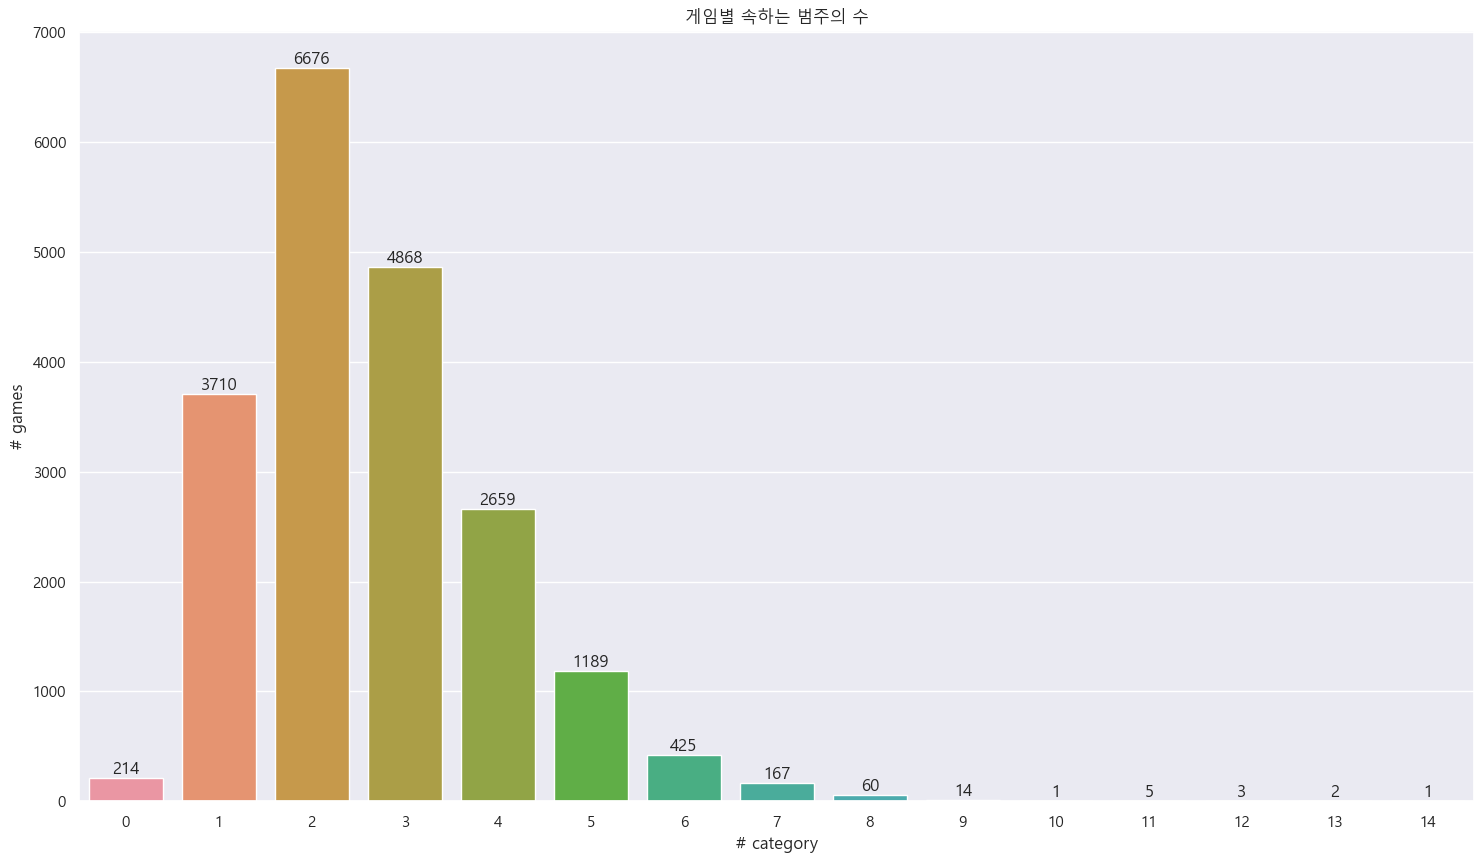

In [19]:
visualizing(df.Ncategory, show_values = True, sns_args = {'xlabel':"# category",
                                                "ylabel":"# games",
                                                "title":"게임별 속하는 범주의 수"})

1.2 Posterior Information (Statistics including Survey)

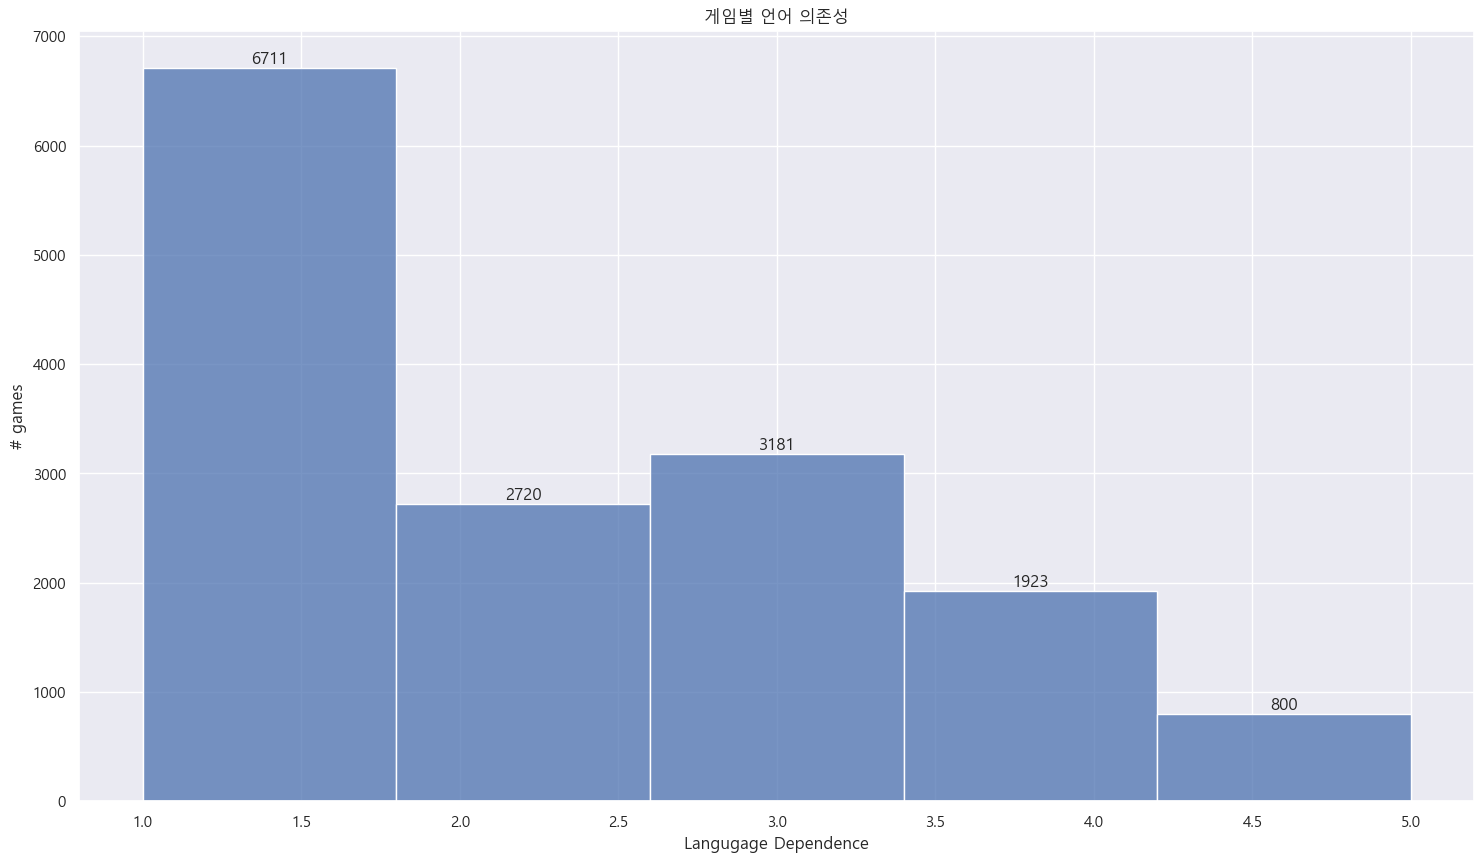

In [20]:
visualizing(df.Language_dependence, continuous_value=True, show_values= True,
                                                    plot_args= {"bins": 5},
                                                    sns_args = {'xlabel':"Langugage Dependence",
                                                   "ylabel":"# games",
                                                   "title":"게임별 언어 의존성"})

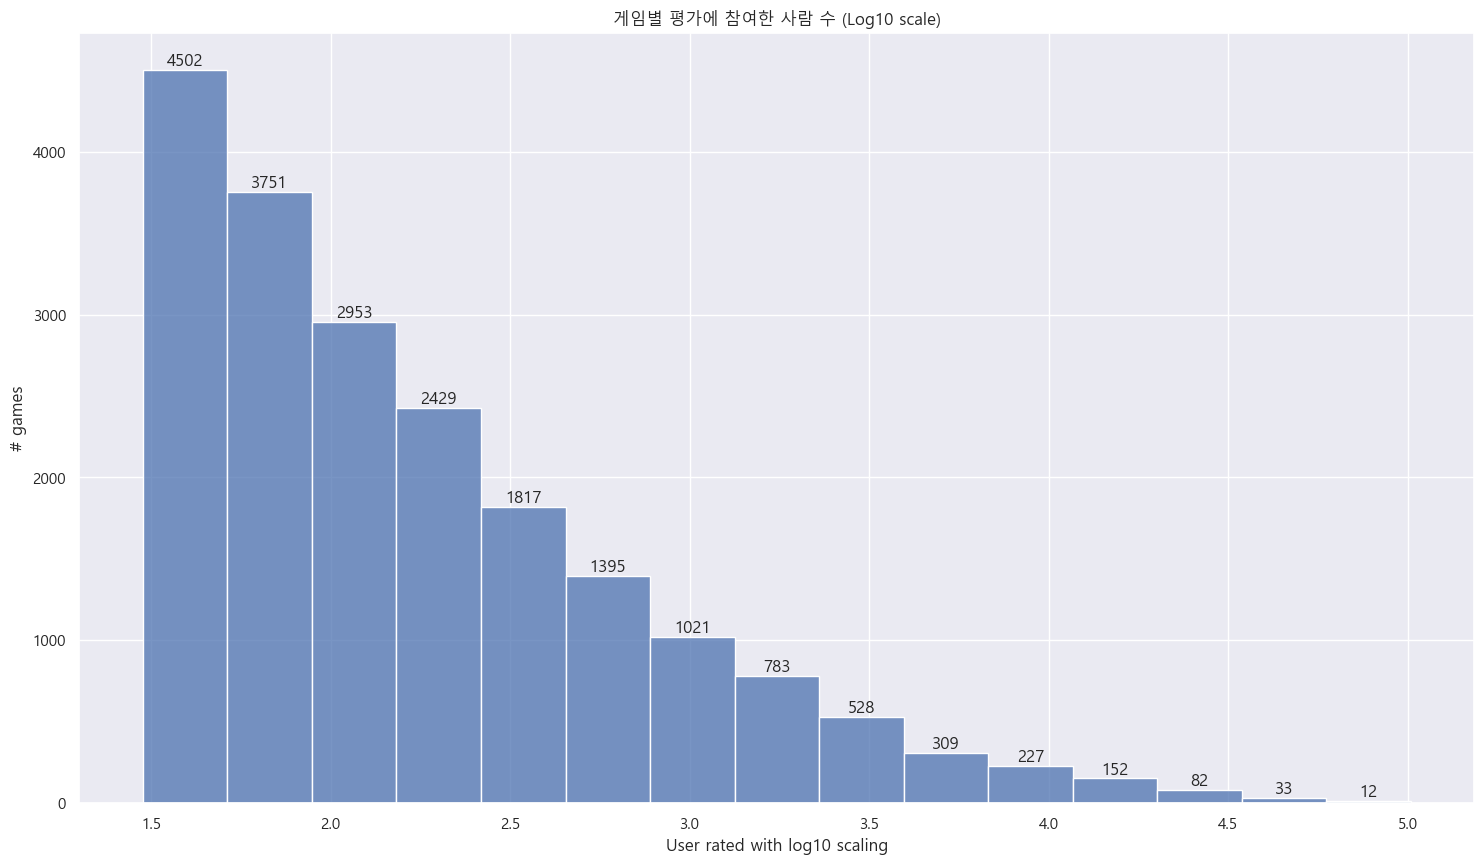

In [21]:
visualizing(df.Users_rated, scale = np.log10, continuous_value=True, show_values= True,
                                                plot_args={"bins" : 15},
                                                sns_args = {'xlabel':"User rated with log10 scaling",
                                                   "ylabel":"# games",
                                                   "title":"게임별 평가에 참여한 사람 수 (Log10 scale)"})

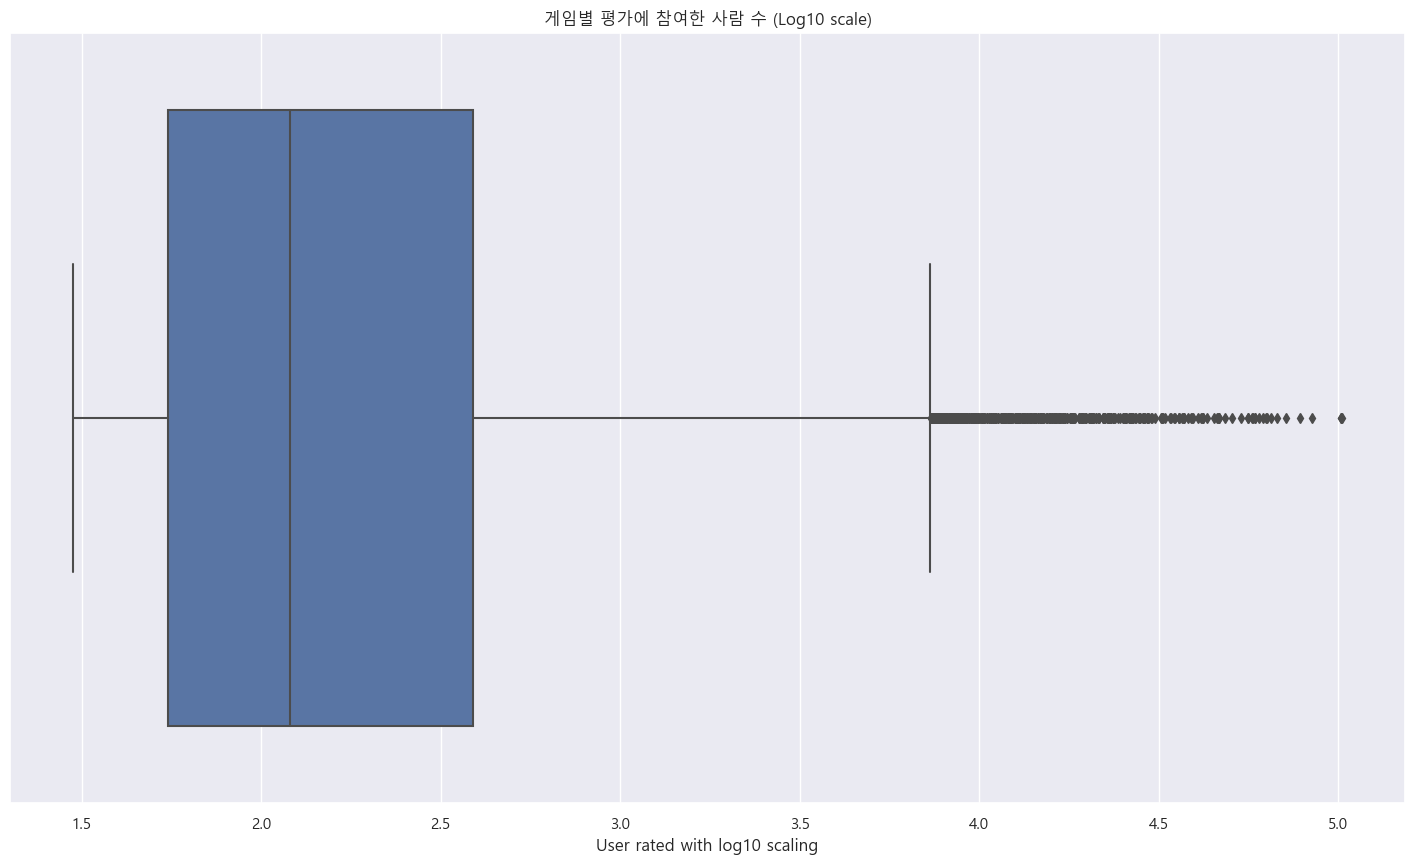

In [22]:
visualizing(df.Users_rated, scale = np.log10, plot_type="box", continuous_value=True, show_values= True,
                                                sns_args = {'xlabel':"User rated with log10 scaling",
                                                   "title":"게임별 평가에 참여한 사람 수 (Log10 scale)"})

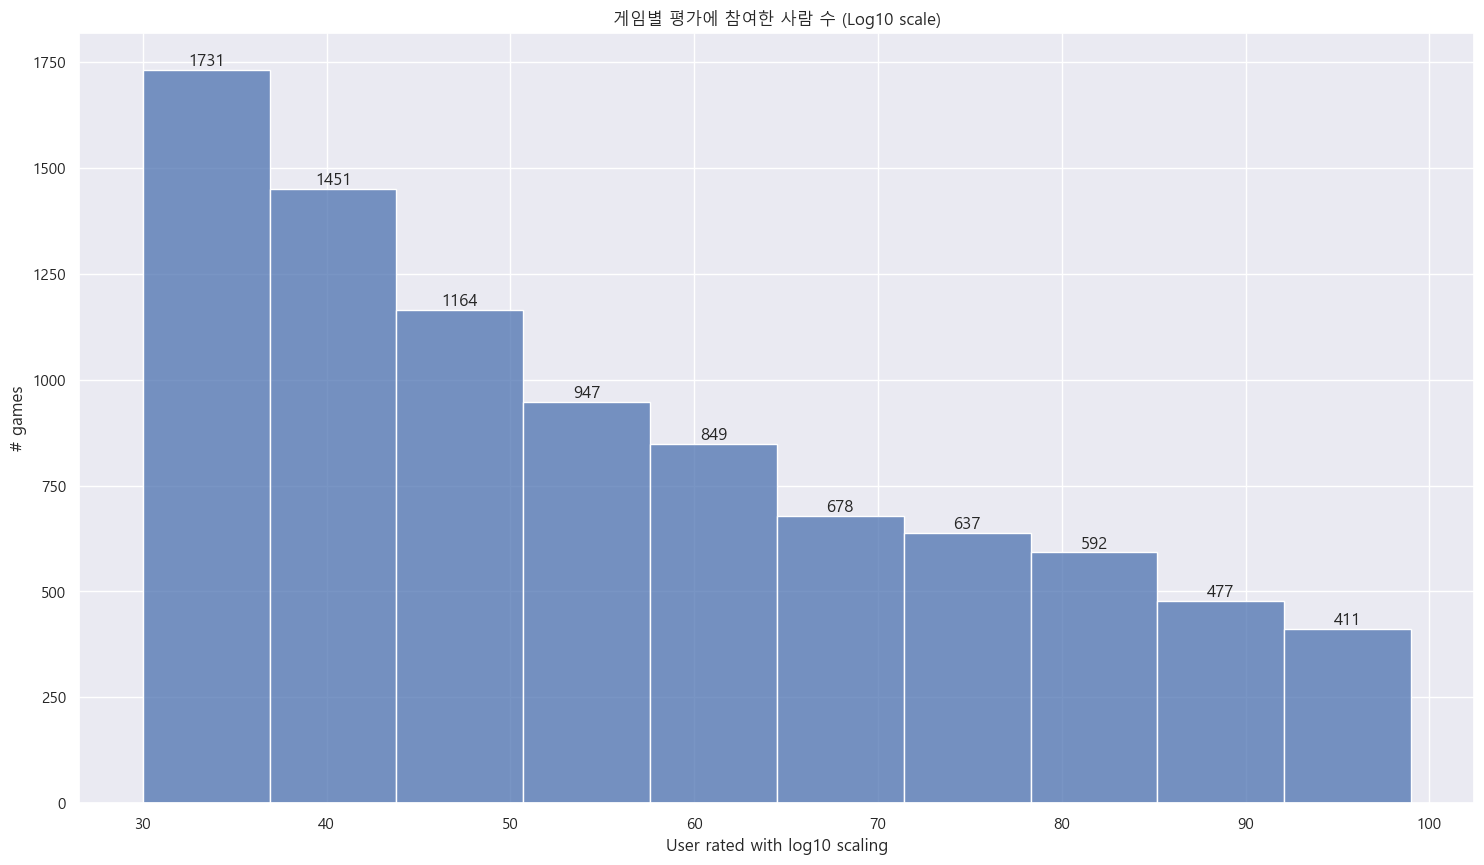

In [38]:
visualizing(df.Users_rated, condition=lambda x : x < 100, continuous_value=True, show_values= True,
                                                plot_args={"bins" : 10},
                                                sns_args = {'xlabel':"User rated with log10 scaling",
                                                   "ylabel":"# games",
                                                   "title":"게임별 평가에 참여한 사람 수 (Log10 scale)"})

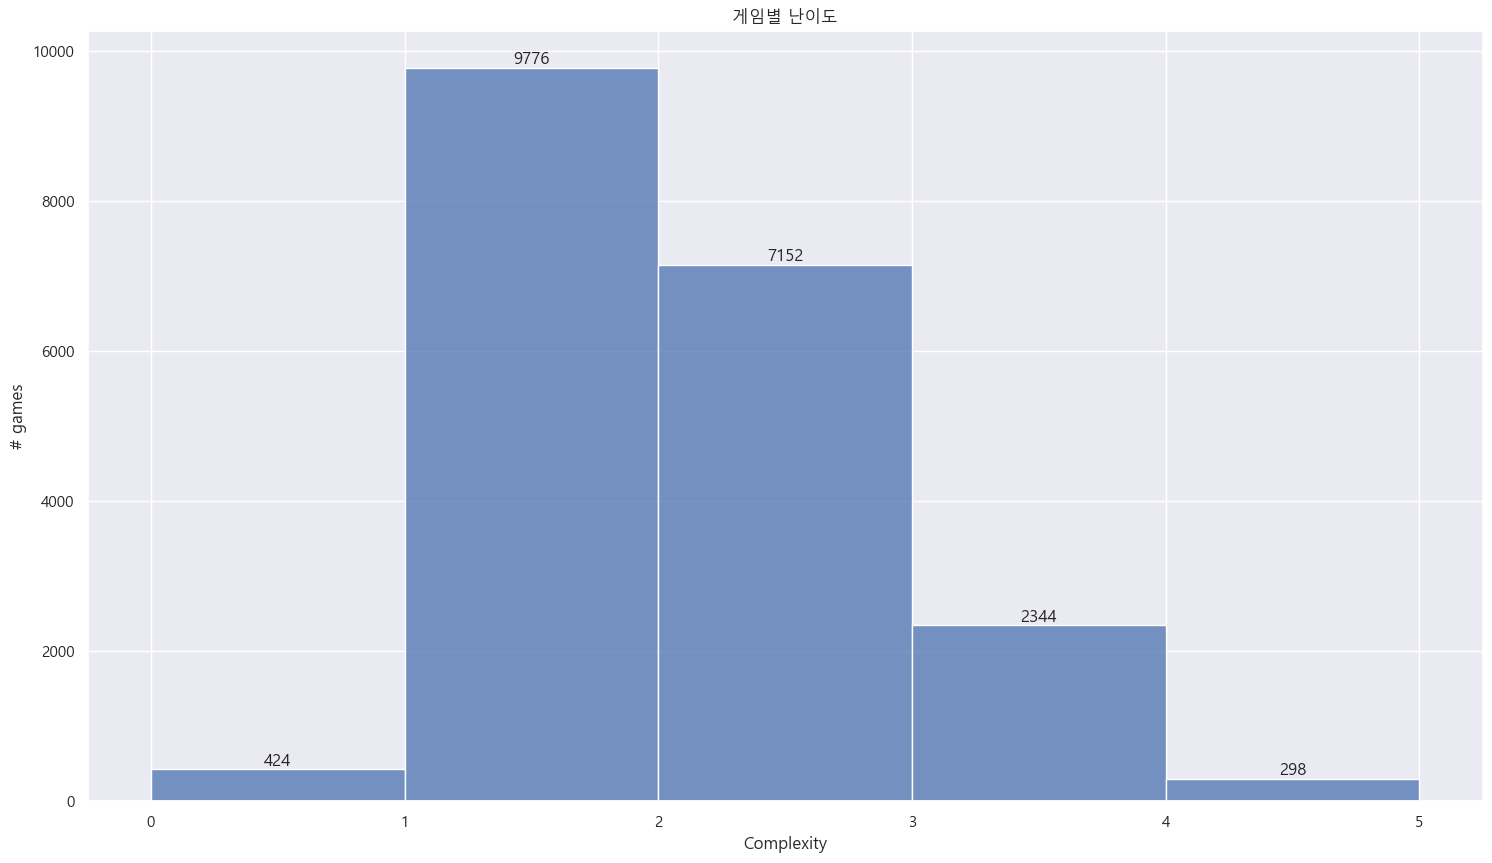

In [23]:
visualizing(df.Complexity, continuous_value=True, show_values= True,
                                                    plot_args= {"bins": 5},
                                                    sns_args = {'xlabel':"Complexity",
                                                   "ylabel":"# games",
                                                   "title":"게임별 난이도"})

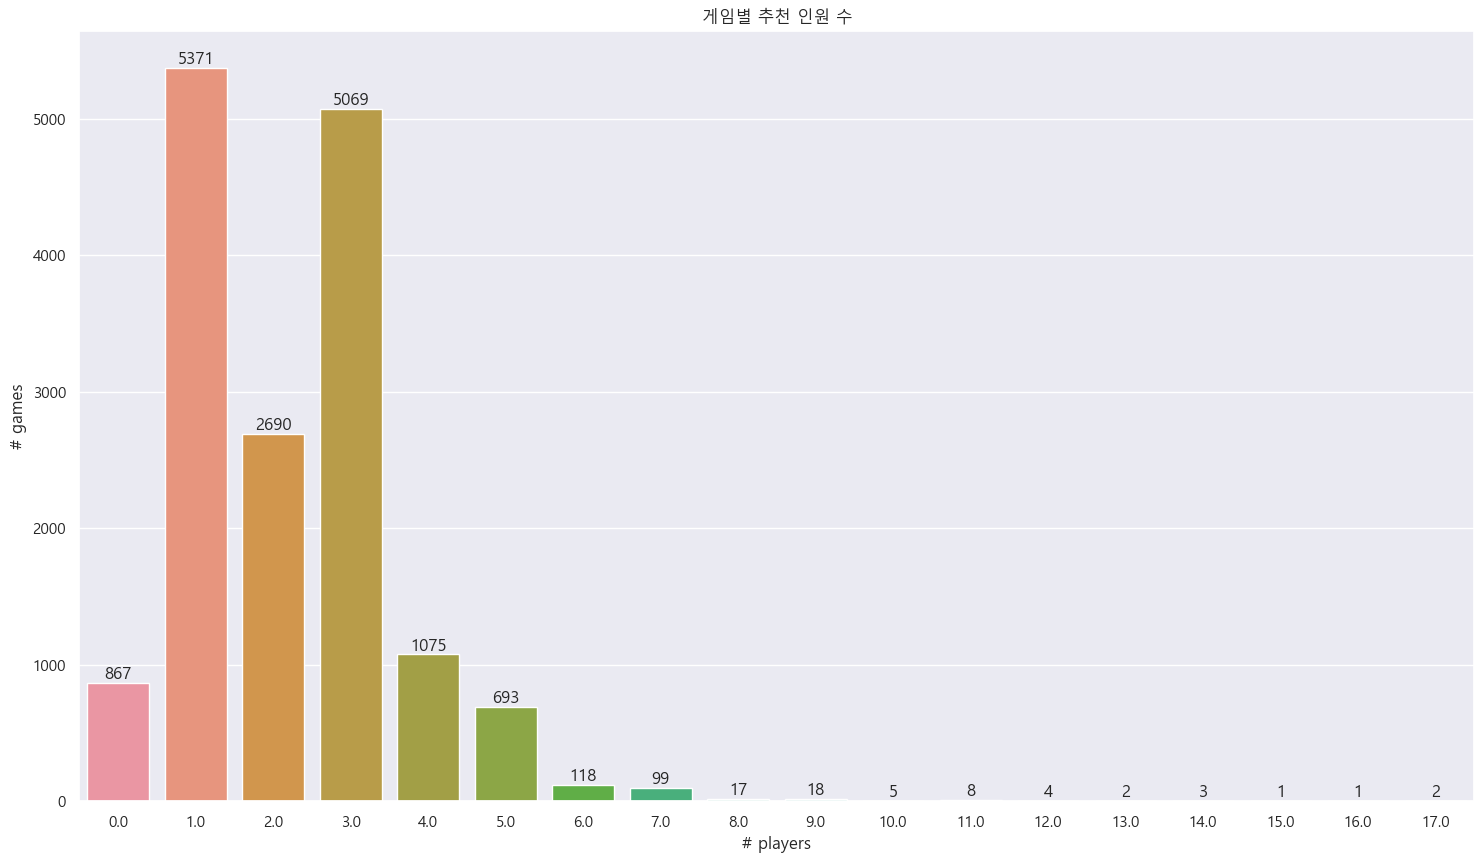

In [24]:
visualizing(df.Sug_players, show_values= True,
                            sns_args = {'xlabel':"# players",
                                        "ylabel":"# games",
                                        "title":"게임별 추천 인원 수"})

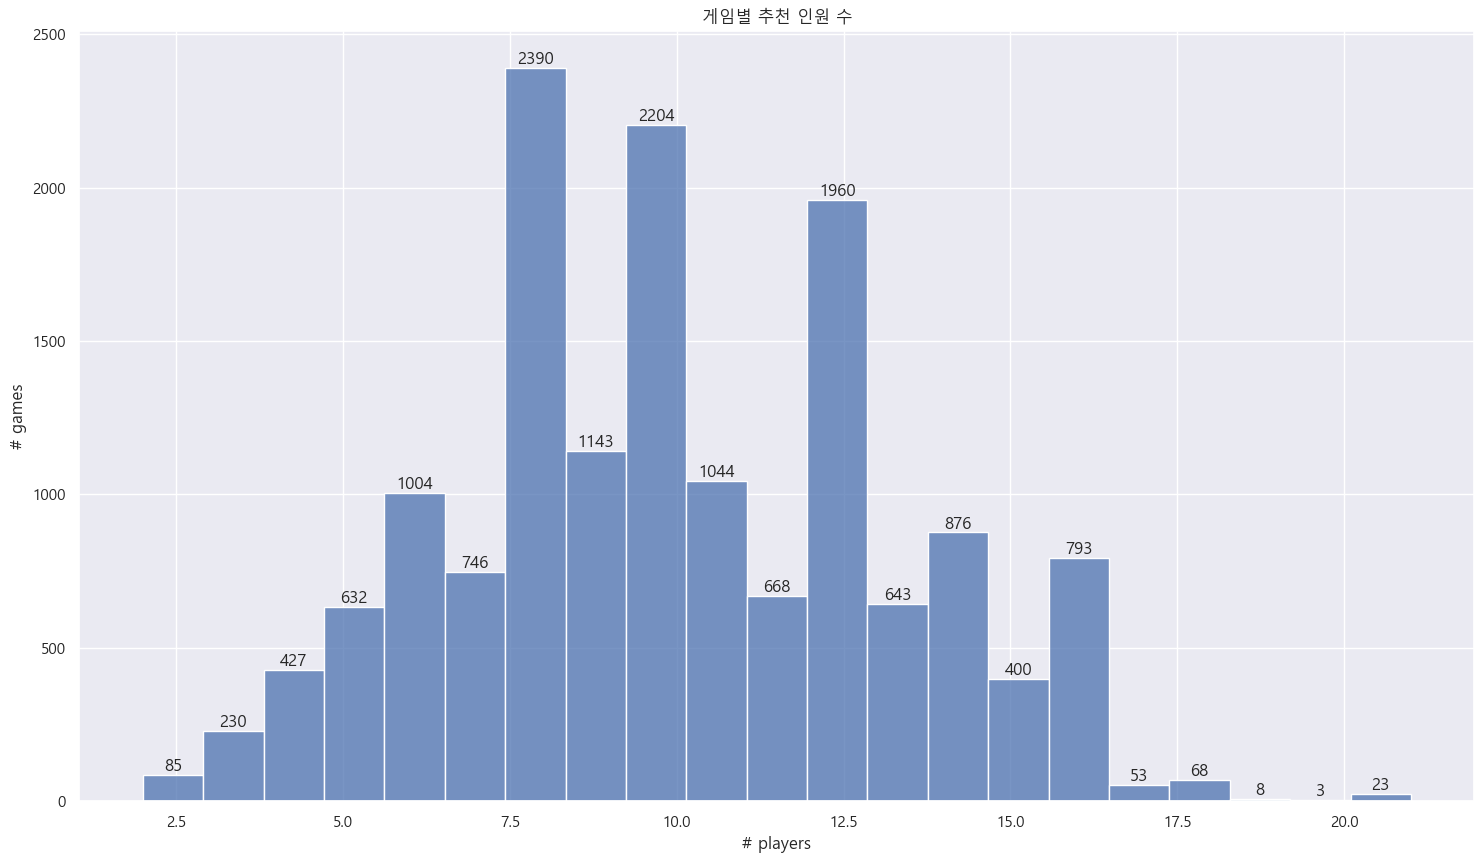

In [25]:
visualizing(df.Sug_age, continuous_value=True, show_values= True,
                            plot_args = {"bins": 21},
                            sns_args = {'xlabel':"# age",
                                        "ylabel":"# games",
                                        "title":"추천 연령에 선정된 게임 수"})

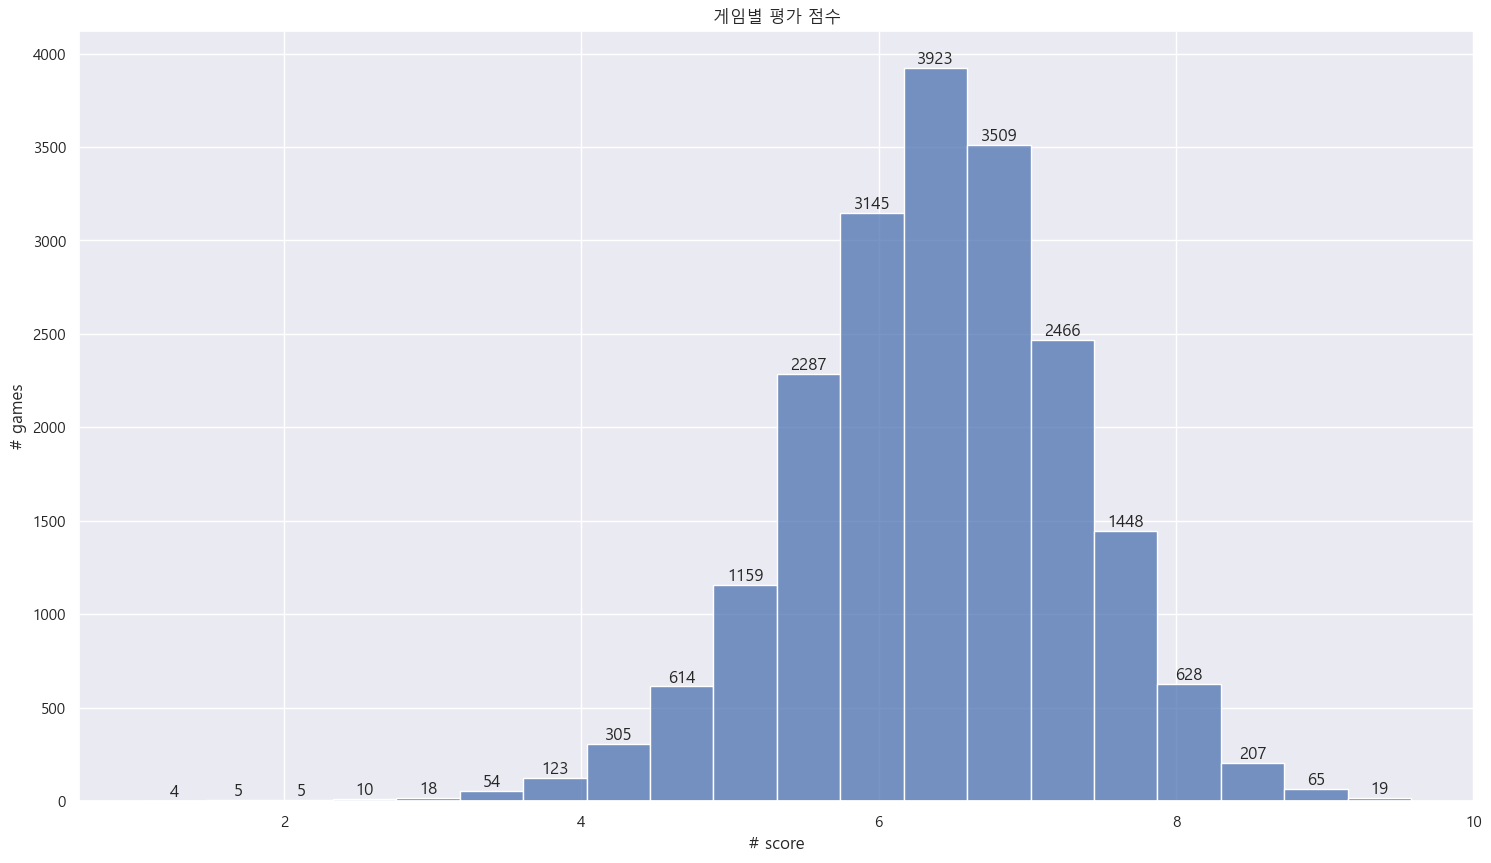

In [26]:
visualizing(df.Rating, continuous_value=True, show_values= True,
                            plot_args = {"bins": 20},
                            sns_args = {'xlabel':"# score",
                                        "ylabel":"# games",
                                        "title":"게임별 평가 점수"})

15517


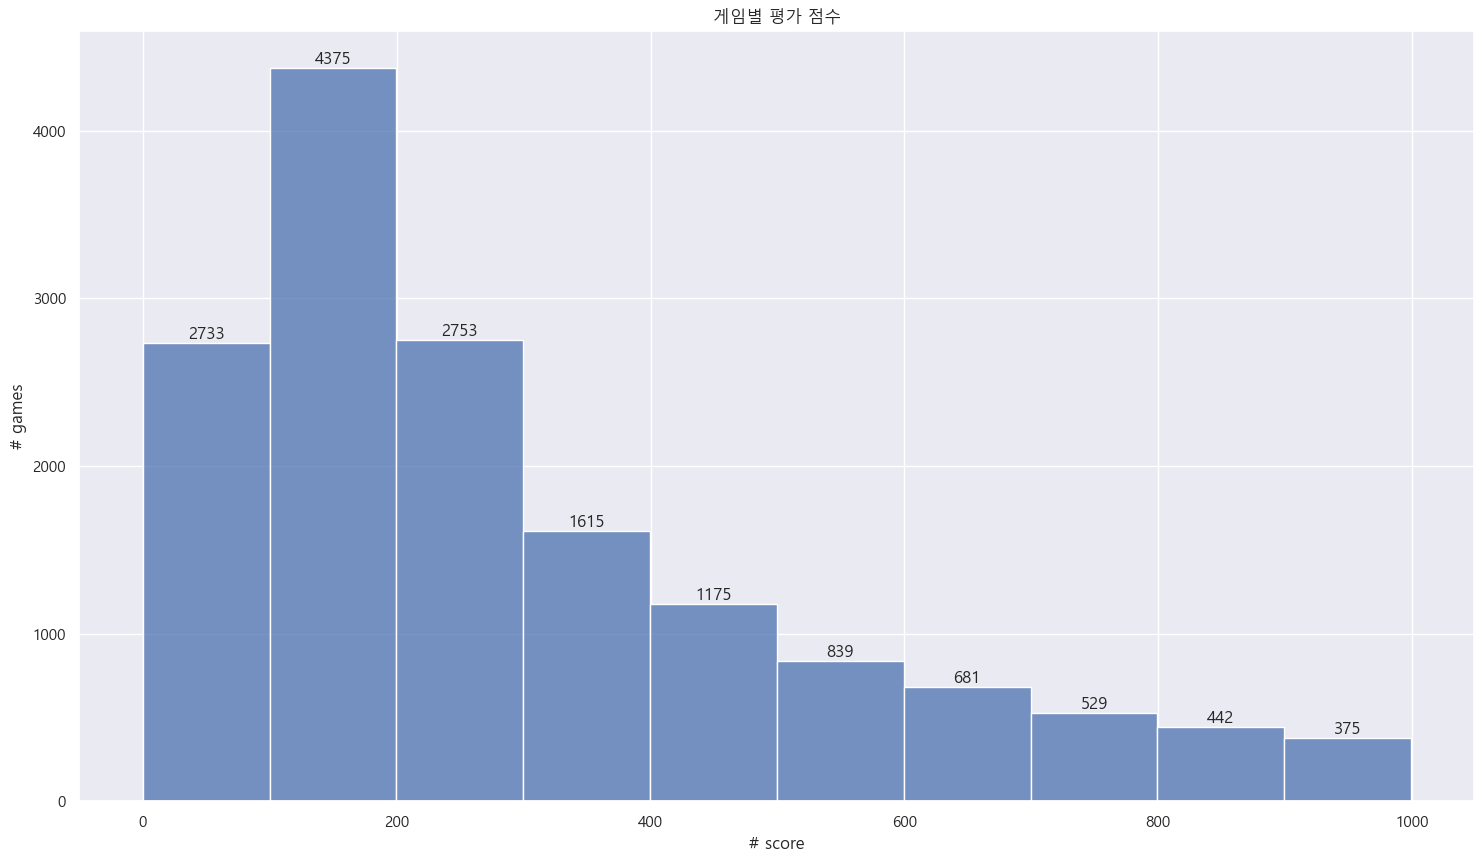

In [32]:
visualizing(df.Own, condition = lambda x : x<1000, continuous_value=True, show_values= True,
                            plot_args = {"bins": 10},
                            sns_args = {'xlabel':"# score",
                                        "ylabel":"# games",
                                        "title":"1000개 미만 보유 유저인 게임"})
print((df.Own < 1000).sum())

2. Visualizing relation between input variable and target variable

In [6]:
with open("dataset//new_bgg_data_after_eda.pickle", 'rb') as f:
    df_ref = pickle.load(f)

In [14]:
def get_count(X):
    X_ = X.apply(pd.Series).stack().reset_index(drop=True).value_counts().sort_values(ascending=False).to_frame()
    X_.columns = ["counts"]
    return X_
mechanics_stat = get_count(df_ref.Mechanics)
domain_stat = get_count(df_ref.Domains)
category_stat = get_count(df_ref.Category)

C:\Users\pokem\AppData\Local\Temp\ipykernel_23188\1194885778.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  X_ = X.apply(pd.Series).stack().reset_index(drop=True).value_counts().sort_values(ascending=False).to_frame()
C:\Users\pokem\AppData\Local\Temp\ipykernel_23188\1194885778.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  X_ = X.apply(pd.Series).stack().reset_index(drop=True).value_counts().sort_values(ascending=False).to_frame()
C:\Users\pokem\AppData\Local\Temp\ipykernel_23188\1194885778.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  X_ = X.apply(pd.Series).stack().reset_index(drop=True).value_counts().sort_values(ascendin

In [12]:
mechanics_stat.head(10).index

Index(['Dice Rolling', 'Hand Management', 'Set Collection',
       'Variable Player Powers', 'Hexagon Grid', 'Simulation', 'Open Drafting',
       'Tile Placement', 'Modular Board', 'Grid Movement'],
      dtype='object')

In [17]:
target_list = ["Rating", "Complexity"]
origin_feature_list = ['Year', 'Minplayers', 'Maxplayers', 'Time', 'Mintime',
       'Maxtime', 'Age', 'Nmechanics', 'Ndomains',
       'Nartist', 'Ndesign', 'Ncategory']
top10_mechanism_list = list(mechanics_stat.head(10).index)
top10_category_list = list(category_stat.head(10).index)
domain_list = list(domain_stat.index)

In [53]:
def heat_corr(df, target_name, feature_list, title, fig_size = (2,5)):
    corr = df[[target_name]+feature_list].corr()[target_name][1:].to_frame()
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['figure.figsize'] = (2, 5)
    ax = sns.heatmap(corr, annot=True)
    ax.set_title(f"{target_name} and {title}")
    plt.show()

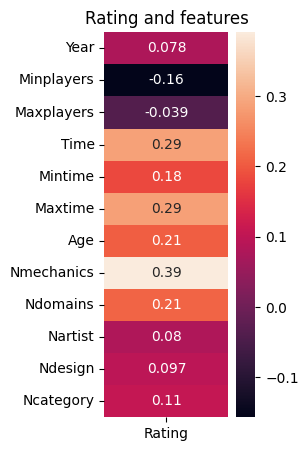

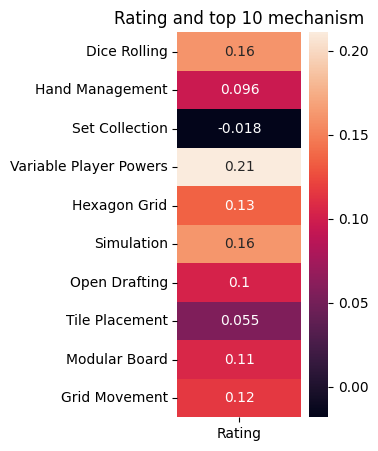

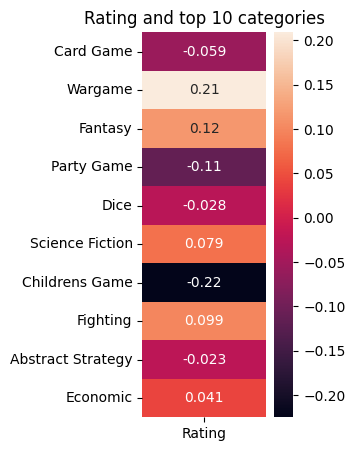

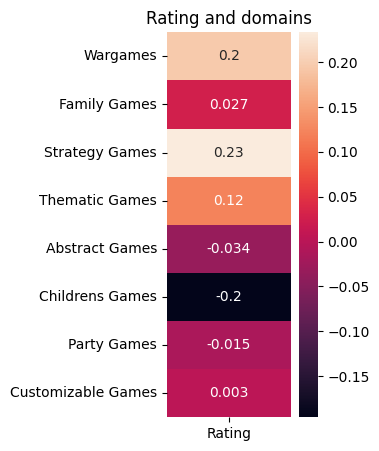

In [54]:
target_ = target_list[0]
heat_corr(df, target_, origin_feature_list, "features")
heat_corr(df, target_, top10_mechanism_list, "top 10 mechanism")
heat_corr(df, target_, top10_category_list, "top 10 categories")
heat_corr(df, target_, domain_list, "domains")

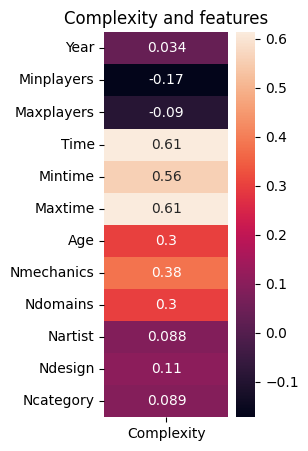

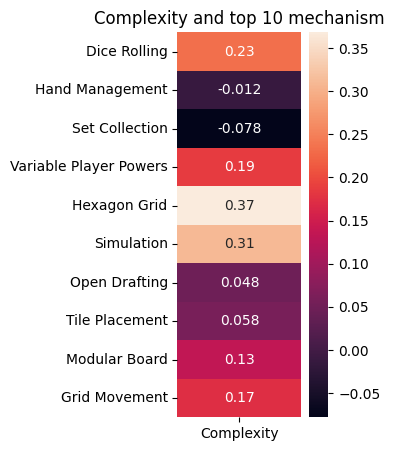

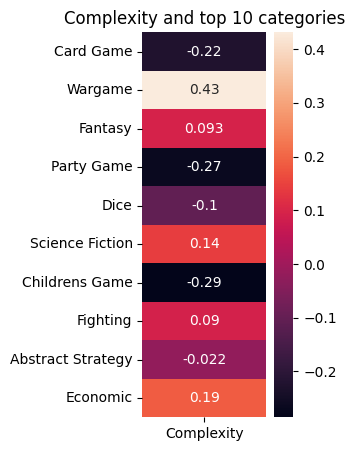

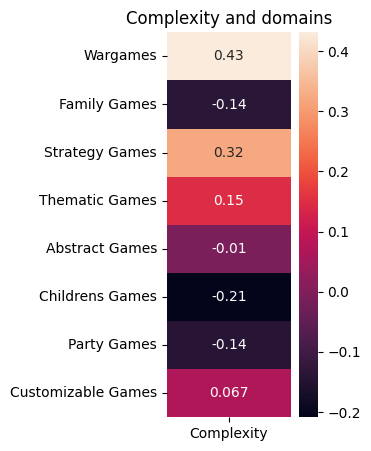

In [55]:
target_ = target_list[1]
heat_corr(df, target_, origin_feature_list, "features")
heat_corr(df, target_, top10_mechanism_list, "top 10 mechanism")
heat_corr(df, target_, top10_category_list, "top 10 categories")
heat_corr(df, target_, domain_list, "domains")

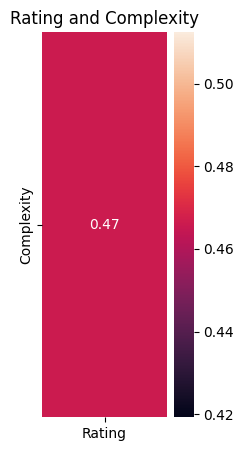

In [59]:
heat_corr(df, target_list[0], [target_list[1]], "Complexity", fig_size=(1,1))